# Import libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install xgboost

In [3]:
# Basic data handling libraries
import numpy as np
import pandas as pd
np.random.seed(1)

# Cross validation and hyperparameter tuning libraries
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Machine learning classifiers
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

# Root mean square energy 

## Window size = 512

In [ ]:
rf_data = np.loadtxt("/content/drive/MyDrive/CEERI Project - Kalit/data/rms_features/rms_energy_wl=512.csv", delimiter=",")

In [ ]:
rf_data.shape

(5, 4433537)

In [ ]:
x = np.transpose(rf_data[0:2,:])
Label_1 = np.transpose(rf_data[2:3,:]); Label_1 = Label_1.astype(int);
Label_2 = np.transpose(rf_data[3:4,:]); Label_2 = Label_2.astype(int);
Label_3 = np.transpose(rf_data[4:5,:]); Label_3 = Label_3.astype(int);

In [ ]:
# Preprocessing
scl = StandardScaler()
x = scl.fit_transform(x)

In [ ]:
# Cross validation and model training
cvscores = []
avg_score = 0.0
K = 5
kfold = StratifiedKFold(n_splits=K, shuffle=True, random_state=1)
fold = 1

for train, test in kfold.split(x, Label_1):
    print("Cross Validation fold: {}".format(fold))
    model = XGBClassifier(objective = "binary:logistic",seed=42)
    model.fit(x[train], Label_1[train])
    score = model.score(x[test], Label_1[test])
    y_pred = model.predict(x[test])
    cm = confusion_matrix(Label_1[test], y_pred)
    print(cm)
    cvscores.append(score)
    avg_score = avg_score + score
    print("Score: {}".format(score))
    fold = fold+1

# Results
avg_score = avg_score/K
print("Cross validation scores: {}".format(cvscores))
print("Accuracy: {}".format(avg_score))

Cross Validation fold: 1
[[159941    214]
 [   279 726274]]
Score: 0.9994440108806958
Cross Validation fold: 2
[[159952    202]
 [   265 726289]]
Score: 0.999473332822079
Cross Validation fold: 3
[[159924    230]
 [   255 726298]]
Score: 0.999453032399654
Cross Validation fold: 4
[[159936    218]
 [   282 726271]]
Score: 0.999436115875932
Cross Validation fold: 5
[[159946    208]
 [   275 726278]]
Score: 0.9994552879361502
Cross validation scores: [0.9994440108806958, 0.999473332822079, 0.999453032399654, 0.999436115875932, 0.9994552879361502]
Accuracy: 0.9994523559829023


In [ ]:
# Cross validation and model training
cvscores = []
avg_score = 0.0
K = 5
kfold = StratifiedKFold(n_splits=K, shuffle=True, random_state=1)
fold = 1

for train, test in kfold.split(x, Label_2):
    print("Cross Validation fold: {}".format(fold))
    model = XGBClassifier(objective = "multi:softmax",seed=42)
    model.fit(x[train], Label_2[train])
    score = model.score(x[test], Label_2[test])
    y_pred = model.predict(x[test])
    cm = confusion_matrix(Label_2[test], y_pred)
    print(cm)
    cvscores.append(score)
    avg_score = avg_score + score
    print("Score: {}".format(score))
    fold = fold+1

# Results
avg_score = avg_score/K
print("Cross validation scores: {}".format(cvscores))
print("Accuracy: {}".format(avg_score))

Cross Validation fold: 1
[[159934      0      0    221]
 [     0 320822   6727    571]
 [   122   3994 310071   2216]
 [   196      0   3380  78454]]
Score: 0.980346404904433
Cross Validation fold: 2
[[159939      0      0    215]
 [     0 320707   6834    580]
 [   122   4116 309936   2228]
 [   178      1   3607  78245]]
Score: 0.9798343986972036
Cross Validation fold: 3
[[159913      0      0    241]
 [     0 320353   7161    607]
 [   138   4012 310031   2221]
 [   188      2   3430  78410]]
Score: 0.9797001715335505
Cross Validation fold: 4
[[159931      0      0    223]
 [     0 320612   6913    596]
 [   149   3992 309952   2309]
 [   183      0   3412  78435]]
Score: 0.9799516638528849
Cross Validation fold: 5
[[159926      0      0    228]
 [     0 320592   6914    615]
 [   130   3993 310010   2269]
 [   193      0   3370  78467]]
Score: 0.9800249687890137
Cross validation scores: [0.980346404904433, 0.9798343986972036, 0.9797001715335505, 0.9799516638528849, 0.98002496878901

In [ ]:
# Cross validation and model training
cvscores = []
avg_score = 0.0
K = 5
kfold = StratifiedKFold(n_splits=K, shuffle=True, random_state=1)
fold = 1

for train, test in kfold.split(x, Label_3):
    print("Cross Validation fold: {}".format(fold))
    model = XGBClassifier(objective = "multi:softmax",seed=42)
    model.fit(x[train], Label_3[train])
    score = model.score(x[test], Label_3[test])
    y_pred = model.predict(x[test])
    cm = confusion_matrix(Label_3[test], y_pred)
    print(cm)
    cvscores.append(score)
    avg_score = avg_score + score
    print("Score: {}".format(score))
    fold = fold+1

# Results
avg_score = avg_score/K
print("Cross validation scores: {}".format(cvscores))
print("Accuracy: {}".format(avg_score))

Cross Validation fold: 1
[[159957      0      0      0      0      0      0      0      0    198]
 [     0  52105  18498   9918    131    885     22     69     28    374]
 [     0  14908  61582    425      0   4930     40     13     18    114]
 [     0  11144   1054  59360   9752    639     14      0      0     67]
 [     0    774    586  10751  69479    337     43      0      0     60]
 [     0    312   3623      0      0  77929     30     18     28     91]
 [   120      0      4      0      0      0  81569      9     17    311]
 [     0      0      0      0      0      0      0  72786   9014    230]
 [    10      1      0      0      0      0      0  12322  56344   1635]
 [   231      2      0      0      0      0     41    894   2158  78704]]
Score: 0.8681719348421352
Cross Validation fold: 2
[[159955      0      0      0      0      0      0      0      0    199]
 [     0  52279  18659   9572    168    828     28     78     18    401]
 [     0  14888  61579    398      2   5005    

In [ ]:
np.unique(Label_1, return_counts=True)

(array([0, 1]), array([ 800771, 3632766]))

In [ ]:
np.unique(Label_2, return_counts=True)

(array([0, 1, 2, 3]), array([ 800771, 1640604, 1582011,  410151]))

In [ ]:
np.unique(Label_3, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([800771, 410151, 410151, 410151, 410151, 410151, 410151, 410151,
        351558, 410151]))

## Window size = 2048

In [ ]:
rf_data = np.loadtxt("/content/drive/MyDrive/CEERI Project - Kalit/data/rms_features/rms_energy_wl=2048.csv", delimiter=",")

In [ ]:
rf_data.shape

(5, 1108214)

In [ ]:
x = np.transpose(rf_data[0:2,:])
Label_1 = np.transpose(rf_data[2:3,:]); Label_1 = Label_1.astype(int);
Label_2 = np.transpose(rf_data[3:4,:]); Label_2 = Label_2.astype(int);
Label_3 = np.transpose(rf_data[4:5,:]); Label_3 = Label_3.astype(int);

In [ ]:
# Preprocessing
scl = StandardScaler()
x = scl.fit_transform(x)

In [ ]:
# Cross validation and model training
cvscores = []
avg_score = 0.0
K = 5
kfold = StratifiedKFold(n_splits=K, shuffle=True, random_state=1)
fold = 1

for train, test in kfold.split(x, Label_1):
    print("Cross Validation fold: {}".format(fold))
    model = XGBClassifier(objective = "binary:logistic",seed=42)
    model.fit(x[train], Label_1[train])
    score = model.score(x[test], Label_1[test])
    y_pred = model.predict(x[test])
    cm = confusion_matrix(Label_1[test], y_pred)
    print(cm)
    cvscores.append(score)
    avg_score = avg_score + score
    print("Score: {}".format(score))
    fold = fold+1

# Results
avg_score = avg_score/K
print("Cross validation scores: {}".format(cvscores))
print("Accuracy: {}".format(avg_score))

Cross Validation fold: 1
[[ 39957     76]
 [    78 181532]]
Score: 0.9993051889750635
Cross Validation fold: 2
[[ 39963     70]
 [    83 181527]]
Score: 0.9993097007349657
Cross Validation fold: 3
[[ 39969     63]
 [    86 181525]]
Score: 0.9993277477745744
Cross Validation fold: 4
[[ 39976     56]
 [    91 181520]]
Score: 0.9993367712943788
Cross Validation fold: 5
[[ 39953     79]
 [    68 181542]]
Score: 0.9993367683020367
Cross validation scores: [0.9993051889750635, 0.9993097007349657, 0.9993277477745744, 0.9993367712943788, 0.9993367683020367]
Accuracy: 0.9993232354162037


In [ ]:
# Cross validation and model training
cvscores = []
avg_score = 0.0
K = 5
kfold = StratifiedKFold(n_splits=K, shuffle=True, random_state=1)
fold = 1

for train, test in kfold.split(x, Label_2):
    print("Cross Validation fold: {}".format(fold))
    model = XGBClassifier(objective = "multi:softmax",seed=42)
    model.fit(x[train], Label_2[train])
    score = model.score(x[test], Label_2[test])
    y_pred = model.predict(x[test])
    cm = confusion_matrix(Label_2[test], y_pred)
    print(cm)
    cvscores.append(score)
    avg_score = avg_score + score
    print("Score: {}".format(score))
    fold = fold+1

# Results
avg_score = avg_score/K
print("Cross validation scores: {}".format(cvscores))
print("Accuracy: {}".format(avg_score))

Cross Validation fold: 1
[[39956     0     0    77]
 [    0 80680  1157   180]
 [   21   578 78200   290]
 [   56     5   639 19804]]
Score: 0.9864511850137383
Cross Validation fold: 2
[[39961     0     0    72]
 [    0 80659  1170   188]
 [   29   544 78208   308]
 [   66     0   559 19879]]
Score: 0.9867534729271847
Cross Validation fold: 3
[[39967     0     0    65]
 [    0 80686  1154   178]
 [   27   565 78189   307]
 [   69     2   588 19846]]
Score: 0.9866677494890432
Cross Validation fold: 4
[[39974     0     0    58]
 [    0 80621  1228   169]
 [   27   518 78216   327]
 [   62     0   587 19856]]
Score: 0.9865730025310973
Cross Validation fold: 5
[[39950     0     0    82]
 [    0 80632  1223   163]
 [   34   548 78210   296]
 [   66     1   595 19842]]
Score: 0.9864285649831711
Cross validation scores: [0.9864511850137383, 0.9867534729271847, 0.9866677494890432, 0.9865730025310973, 0.9864285649831711]
Accuracy: 0.9865747949888469


In [ ]:
# Cross validation and model training
cvscores = []
avg_score = 0.0
K = 5
kfold = StratifiedKFold(n_splits=K, shuffle=True, random_state=1)
fold = 1

for train, test in kfold.split(x, Label_3):
    print("Cross Validation fold: {}".format(fold))
    model = XGBClassifier(objective = "multi:softmax",seed=42)
    model.fit(x[train], Label_3[train])
    score = model.score(x[test], Label_3[test])
    y_pred = model.predict(x[test])
    cm = confusion_matrix(Label_3[test], y_pred)
    print(cm)
    cvscores.append(score)
    avg_score = avg_score + score
    print("Score: {}".format(score))
    fold = fold+1

# Results
avg_score = avg_score/K
print("Cross validation scores: {}".format(cvscores))
print("Accuracy: {}".format(avg_score))

Cross Validation fold: 1
[[39981     0     0     0     0     0     0     0     0    52]
 [    0 18737   724   775     1   139     2    10     9   107]
 [    0   493 19136     0     6   835     5     0     1    29]
 [    0  1092   131 18447   676   146     1     0     0    11]
 [    0    93   156   909 19256    58     8     0     0    24]
 [    0    60   477     1     0 19917     4    15     2    29]
 [   31     0     0     0     0     0 20363     4     7    99]
 [    0     0     0     0     0     0     0 20089   329    87]
 [    2     0     0     0     0     0     0   828 16560   185]
 [   83     0     0     0     0     0     1   166   336 19918]]
Score: 0.9583158502637124
Cross Validation fold: 2
[[39975     0     0     0     0     0     0     0     0    58]
 [    0 18703   765   772     1   130     2    15    12   104]
 [    0   509 19152     0     2   804     4     0     1    32]
 [    0   979   126 18484   726   165     2     0     0    23]
 [    0   128   129   962 19194    62    

In [ ]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
# from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [ ]:
pca = PCA()
pca_result = pca.fit_transform(x)
pca_result.shape

(1108214, 2)

In [ ]:
pca.explained_variance_ratio_

array([0.51164954, 0.48835046])

In [ ]:
x1 = pca_result[:,0]
x2 = pca_result[:,1] 

In [ ]:
x1 = np.reshape(x1, x1.shape[0])
x2 = np.reshape(x2, x2.shape[0])

In [ ]:
Label_1 = np.reshape(Label_1, Label_1.shape[0])

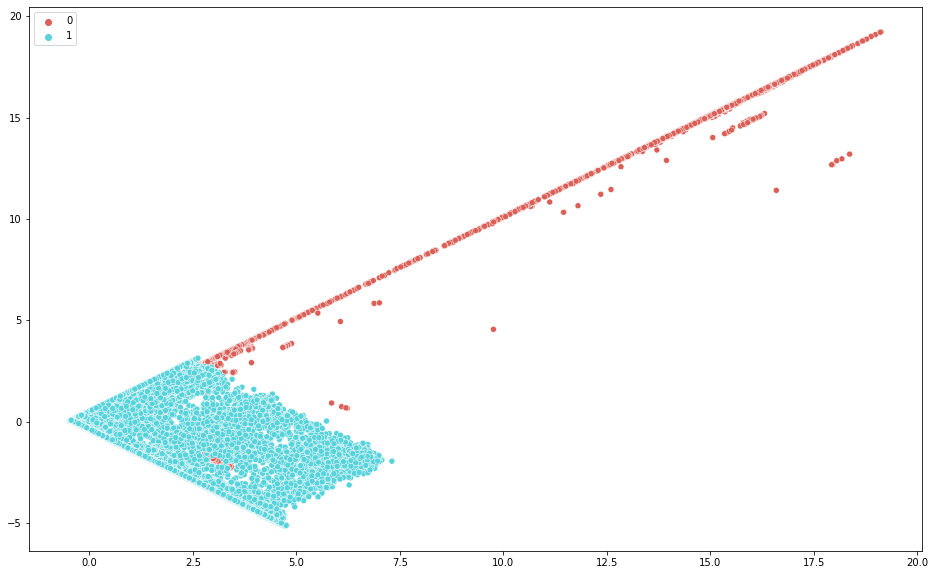

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=x1, y=x2,
    hue=Label_1,
    palette=sns.color_palette("hls", 2),
    legend="full",
)

In [ ]:
Label_2 = np.reshape(Label_2, Label_2.shape[0])

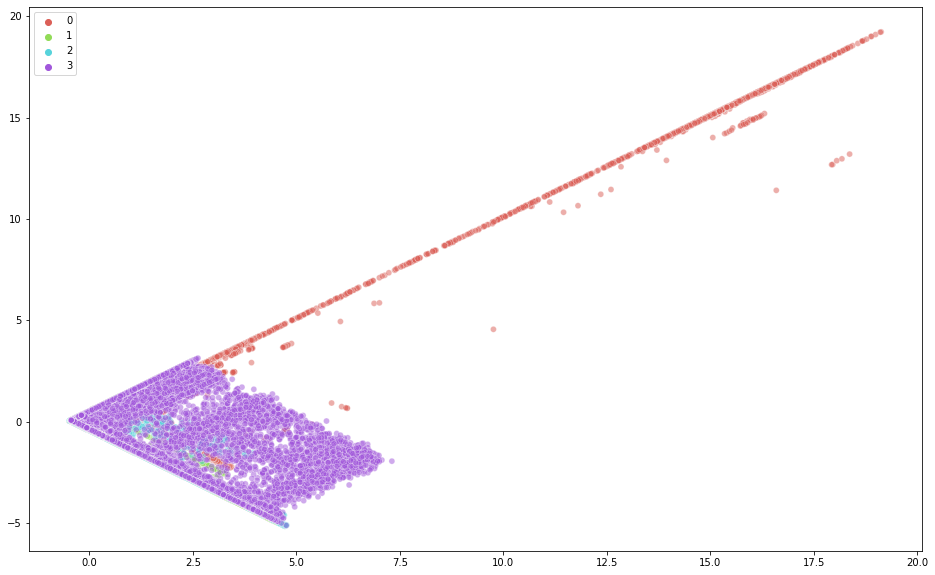

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=x1, y=x2,
    hue=Label_2,
    palette=sns.color_palette("hls", 4),
    legend="full",
    alpha = 0.5
)

In [ ]:
Label_3 = np.reshape(Label_3, Label_3.shape[0])

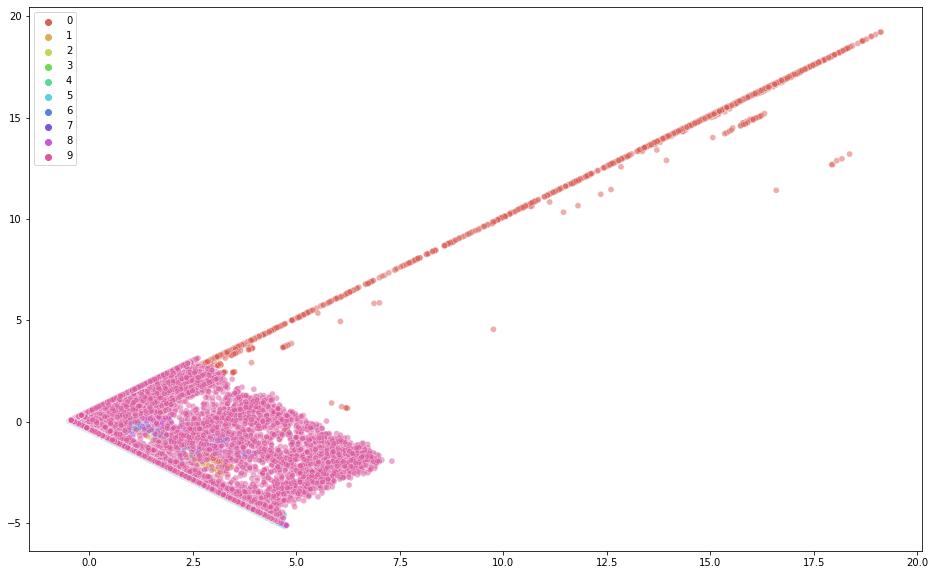

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=x1, y=x2,
    hue=Label_3,
    palette=sns.color_palette("hls", 10),
    legend="full",
    alpha = 0.5
)

## Window size = 1024

In [ ]:
rf_data = np.loadtxt("/content/drive/MyDrive/CEERI Project - Kalit/data/rms_features/rms_energy_wl=1024.csv", delimiter=",")

In [ ]:
rf_data.shape

(5, 2216655)

In [ ]:
x = np.transpose(rf_data[0:2,:])
Label_1 = np.transpose(rf_data[2:3,:]); Label_1 = Label_1.astype(int);
Label_2 = np.transpose(rf_data[3:4,:]); Label_2 = Label_2.astype(int);
Label_3 = np.transpose(rf_data[4:5,:]); Label_3 = Label_3.astype(int);

In [ ]:
# Preprocessing
scl = StandardScaler()
x = scl.fit_transform(x)

In [ ]:
# Cross validation and model training
cvscores = []
avg_score = 0.0
K = 5
kfold = StratifiedKFold(n_splits=K, shuffle=True, random_state=1)
fold = 1

for train, test in kfold.split(x, Label_1):
    print("Cross Validation fold: {}".format(fold))
    model = XGBClassifier(objective = "binary:logistic",seed=42)
    model.fit(x[train], Label_1[train])
    score = model.score(x[test], Label_1[test])
    y_pred = model.predict(x[test])
    cm = confusion_matrix(Label_1[test], y_pred)
    print(cm)
    cvscores.append(score)
    avg_score = avg_score + score
    print("Score: {}".format(score))
    fold = fold+1

# Results
avg_score = avg_score/K
print("Cross validation scores: {}".format(cvscores))
print("Accuracy: {}".format(avg_score))

Cross Validation fold: 1
[[ 79967    106]
 [   154 363104]]
Score: 0.9994135307479062
Cross Validation fold: 2
[[ 79965    108]
 [   143 363115]]
Score: 0.9994338316066325
Cross Validation fold: 3
[[ 79969    104]
 [   173 363085]]
Score: 0.9993751846814232
Cross Validation fold: 4
[[ 79973    100]
 [   144 363114]]
Score: 0.9994496211634196
Cross Validation fold: 5
[[ 79931    142]
 [   132 363126]]
Score: 0.9993819516343319
Cross validation scores: [0.9994135307479062, 0.9994338316066325, 0.9993751846814232, 0.9994496211634196, 0.9993819516343319]
Accuracy: 0.9994108239667426


In [ ]:
# Cross validation and model training
cvscores = []
avg_score = 0.0
K = 5
kfold = StratifiedKFold(n_splits=K, shuffle=True, random_state=1)
fold = 1

for train, test in kfold.split(x, Label_2):
    print("Cross Validation fold: {}".format(fold))
    model = XGBClassifier(objective = "multi:softmax",seed=42)
    model.fit(x[train], Label_2[train])
    score = model.score(x[test], Label_2[test])
    y_pred = model.predict(x[test])
    cm = confusion_matrix(Label_2[test], y_pred)
    print(cm)
    cvscores.append(score)
    avg_score = avg_score + score
    print("Score: {}".format(score))
    fold = fold+1

# Results
avg_score = avg_score/K
print("Cross validation scores: {}".format(cvscores))
print("Accuracy: {}".format(avg_score))

Cross Validation fold: 1
[[ 79964      0      0    109]
 [     0 159744   4016    292]
 [    63   2418 154948    764]
 [   116      0   1397  39500]]
Score: 0.9793044023539974
Cross Validation fold: 2
[[ 79963      0      0    110]
 [     0 159593   4136    323]
 [    77   2392 155031    693]
 [   108      0   1424  39481]]
Score: 0.9791059050686733
Cross Validation fold: 3
[[ 79965      0      0    108]
 [     0 159791   3937    324]
 [    63   2465 154939    726]
 [   120      1   1349  39543]]
Score: 0.9794893657335039
Cross Validation fold: 4
[[ 79974      0      0     99]
 [     0 159823   3890    339]
 [    54   2468 154925    746]
 [   104      0   1402  39507]]
Score: 0.9794690648747776
Cross Validation fold: 5
[[ 79955      0      0    118]
 [     0 159754   3991    307]
 [    54   2419 154945    775]
 [    98      2   1368  39545]]
Score: 0.9794013953456898
Cross validation scores: [0.9793044023539974, 0.9791059050686733, 0.9794893657335039, 0.9794690648747776, 0.979401395345

In [ ]:
# Cross validation and model training
cvscores = []
avg_score = 0.0
K = 5
kfold = StratifiedKFold(n_splits=K, shuffle=True, random_state=1)
fold = 1

for train, test in kfold.split(x, Label_3):
    print("Cross Validation fold: {}".format(fold))
    model = XGBClassifier(objective = "multi:softmax",seed=42)
    model.fit(x[train], Label_3[train])
    score = model.score(x[test], Label_3[test])
    y_pred = model.predict(x[test])
    cm = confusion_matrix(Label_3[test], y_pred)
    print(cm)
    cvscores.append(score)
    avg_score = avg_score + score
    print("Score: {}".format(score))
    fold = fold+1

# Results
avg_score = avg_score/K
print("Cross validation scores: {}".format(cvscores))
print("Accuracy: {}".format(avg_score))

Cross Validation fold: 1
[[79974     0     0     0     0     0     0     0     0    99]
 [    0 32699  3540  4264    18   247    14    34     7   190]
 [    0  2779 35129     5     1  3013    19     1     6    60]
 [    0  4850   310 32663  2848   309     2     0     0    31]
 [    0   166   271  3475 36920   115    26     0     0    40]
 [    0   124  2263     0     0 38553     9    10     8    46]
 [   64     0     2     0     0     0 40769     4    13   161]
 [    1     0     0     0     0     0     0 38708  2161   143]
 [    7     0     0     0     0     0     0  3170 31543   434]
 [  115     0     0     0     0     0     4   467   794 39633]]
Score: 0.9171273833772058
Cross Validation fold: 2
[[79967     0     0     0     0     0     0     0     0   106]
 [    0 32948  3454  4068    19   277     4    44    13   186]
 [    0  2849 35029     4     4  3056    14     0     5    52]
 [    0  5027   302 32547  2764   331     7     0     0    35]
 [    0   186   253  3401 36989   135    

## Window size = 4096

In [ ]:
rf_data = np.loadtxt("/content/drive/MyDrive/CEERI Project - Kalit/data/rms_features/rms_energy_wl=4096.csv", delimiter=",")

In [ ]:
x = np.transpose(rf_data[0:2,:])
Label_1 = np.transpose(rf_data[2:3,:]); Label_1 = Label_1.astype(int);
Label_2 = np.transpose(rf_data[3:4,:]); Label_2 = Label_2.astype(int);
Label_3 = np.transpose(rf_data[4:5,:]); Label_3 = Label_3.astype(int);

In [ ]:
# Preprocessing
scl = StandardScaler()
x = scl.fit_transform(x)

In [ ]:
# Cross validation and model training
cvscores = []
avg_score = 0.0
K = 5
kfold = StratifiedKFold(n_splits=K, shuffle=True, random_state=1)
fold = 1

for train, test in kfold.split(x, Label_1):
    print("Cross Validation fold: {}".format(fold))
    model = XGBClassifier(objective = "binary:logistic",seed=42)
    model.fit(x[train], Label_1[train])
    score = model.score(x[test], Label_1[test])
    y_pred = model.predict(x[test])
    cm = confusion_matrix(Label_1[test], y_pred)
    print(cm)
    cvscores.append(score)
    avg_score = avg_score + score
    print("Score: {}".format(score))
    fold = fold+1

# Results
avg_score = avg_score/K
print("Cross validation scores: {}".format(cvscores))
print("Accuracy: {}".format(avg_score))

Cross Validation fold: 1
[[19978    39]
 [   42 90763]]
Score: 0.9992690981934995
Cross Validation fold: 2
[[19980    36]
 [   54 90752]]
Score: 0.999187886881666
Cross Validation fold: 3
[[19976    40]
 [   53 90752]]
Score: 0.9991608088719647
Cross Validation fold: 4
[[19964    52]
 [   51 90754]]
Score: 0.9990705732667996
Cross Validation fold: 5
[[19971    45]
 [   51 90754]]
Score: 0.9991337381904152
Cross validation scores: [0.9992690981934995, 0.999187886881666, 0.9991608088719647, 0.9990705732667996, 0.9991337381904152]
Accuracy: 0.999164421080869


In [ ]:
# Cross validation and model training
cvscores = []
avg_score = 0.0
K = 5
kfold = StratifiedKFold(n_splits=K, shuffle=True, random_state=1)
fold = 1

for train, test in kfold.split(x, Label_2):
    print("Cross Validation fold: {}".format(fold))
    model = XGBClassifier(objective = "multi:softmax",seed=42)
    model.fit(x[train], Label_2[train])
    score = model.score(x[test], Label_2[test])
    y_pred = model.predict(x[test])
    cm = confusion_matrix(Label_2[test], y_pred)
    print(cm)
    cvscores.append(score)
    avg_score = avg_score + score
    print("Score: {}".format(score))
    fold = fold+1

# Results
avg_score = avg_score/K
print("Cross validation scores: {}".format(cvscores))
print("Accuracy: {}".format(avg_score))

Cross Validation fold: 1
[[19978     0     0    39]
 [    0 40306   605    97]
 [   11   227 39157   150]
 [   35     0   348  9869]]
Score: 0.9863564996119903
Cross Validation fold: 2
[[19977     0     0    39]
 [    0 40348   567    94]
 [   12   265 39083   184]
 [   47     0   330  9876]]
Score: 0.9861218891555829
Cross Validation fold: 3
[[19975     0     0    41]
 [    0 40314   579   116]
 [   14   232 39108   190]
 [   47     0   328  9877]]
Score: 0.9860405518809612
Cross Validation fold: 4
[[19965     0     0    51]
 [    0 40393   521    95]
 [   15   210 39149   170]
 [   41     0   311  9900]]
Score: 0.9872406854296568
Cross Validation fold: 5
[[19971     0     0    45]
 [    0 40239   680    90]
 [   24   203 39134   183]
 [   49     0   334  9869]]
Score: 0.9854901146894541
Cross validation scores: [0.9863564996119903, 0.9861218891555829, 0.9860405518809612, 0.9872406854296568, 0.9854901146894541]
Accuracy: 0.9862499481535292


In [ ]:
# Cross validation and model training
cvscores = []
avg_score = 0.0
K = 5
kfold = StratifiedKFold(n_splits=K, shuffle=True, random_state=1)
fold = 1

for train, test in kfold.split(x, Label_3):
    print("Cross Validation fold: {}".format(fold))
    model = XGBClassifier(objective = "multi:softmax",seed=42)
    model.fit(x[train], Label_3[train])
    score = model.score(x[test], Label_3[test])
    y_pred = model.predict(x[test])
    cm = confusion_matrix(Label_3[test], y_pred)
    print(cm)
    cvscores.append(score)
    avg_score = avg_score + score
    print("Score: {}".format(score))
    fold = fold+1

# Results
avg_score = avg_score/K
print("Cross validation scores: {}".format(cvscores))
print("Accuracy: {}".format(avg_score))

Cross Validation fold: 1
[[19979     0     0     0     0     0     0     0     0    38]
 [    0  6599   252  3221     7    87     7     5     6    68]
 [    0   172  9674     2     8   371     3     1     0    21]
 [    0  2951   125  7024    56    87     0     0     0     9]
 [    0    63    79   148  9904    36     8     0     0    14]
 [    0    35   149     2     0 10044     1     4     4    14]
 [   11     0     0     0     0     0 10181     1     1    58]
 [    0     0     0     0     0     0     0 10190     1    61]
 [    1     0     0     0     0     0     0    53  8620   114]
 [   42     0     0     0     0     0     0    69   185  9956]]
Score: 0.9219378823699266
Cross Validation fold: 2
[[19983     0     0     0     0     0     0     0     0    33]
 [    0  6588   252  3244    11    74     7     9     9    59]
 [    0   175  9670     0     3   388     0     2     1    13]
 [    0  2751   124  7207    71    88     1     0     0    10]
 [    0    76    77   163  9878    47    

# Zero crossing rate

In [ ]:
Data = np.loadtxt("/content/drive/MyDrive/CEERI Project - Kalit/data/zero_crossing_rate_wl=512.csv", delimiter=",")
print(Data.shape)

(7, 4433537)


In [ ]:
x = np.transpose(Data[0:4,:])
Label_1 = np.transpose(Data[4:5,:]); Label_1 = Label_1.astype(int);
Label_2 = np.transpose(Data[5:6,:]); Label_2 = Label_2.astype(int);
Label_3 = np.transpose(Data[6:7,:]); Label_3 = Label_3.astype(int);

In [ ]:
cvscores = []
cnt = 0
K = 5
kfold = StratifiedKFold(n_splits=K, shuffle=True, random_state=1)
for train, test in kfold.split(x, Label_1):
    cnt = cnt + 1
    model = XGBClassifier()
    model.fit(x[train], Label_1[train])
    score = model.score(x[test], Label_1[test])
    print("Cross validation {} : {}".format(cnt, score))
    cvscores.append(score)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross validation 1 : 0.9309084839654092


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross validation 2 : 0.9378386120346269


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross validation 3 : 0.9336466273526656


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross validation 4 : 0.9329699664037839


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross validation 5 : 0.9344597482595717


In [4]:
acc = (0.9309084839654092+0.9378386120346269+0.9336466273526656+0.9329699664037839+0.9344597482595717)/5
acc

0.9339646876032115

In [ ]:
cnt= 0
K = 5
kfold = StratifiedKFold(n_splits=K, shuffle=True, random_state=1)
for train, test in kfold.split(x, Label_2):
    cnt = cnt + 1
    model = XGBClassifier()
    model.fit(x[train], Label_2[train])
    score = model.score(x[test], Label_2[test])
    print("Cross validation {} : {}".format(cnt, score))
    cvscores.append(score)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross validation 1 : 0.7150448625703163


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross validation 2 : 0.7095391041921354


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross validation 3 : 0.7120525720446551


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross validation 4 : 0.717024902250687


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross validation 5 : 0.7128160711486432


In [5]:
acc = (0.7150448625703163+0.7095391041921354+0.7120525720446551+0.717024902250687+ 0.7128160711486432)/5
acc

0.7132955024412874

In [ ]:
cnt = 0
K = 5
kfold = StratifiedKFold(n_splits=K, shuffle=True, random_state=1)
for train, test in kfold.split(x, Label_3):
    cnt = cnt + 1
    model = XGBClassifier()
    model.fit(x[train], Label_3[train])
    score = model.score(x[test], Label_3[test])
    print("Cross validation {} : {}".format(cnt, score))
    cvscores.append(score)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross validation 1 : 0.64223284328099


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross validation 2 : 0.6417411368793334


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross validation 3 : 0.6317351729488997


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
acc = (0.64223284328099+0.6417411368793334+0.6317351729488997)/3
acc

0.6385697177030744